## Nomes e Número USP:

Daniel Angelo Esteves Lawand - 10297693 \\
Miguel Ostrowski - 10723610


#MRU e MRUV

Erro da Posição:  0.0
Erro da Posição:  0.0
Erro da Posição:  0.0
Erro da Posição:  0.0
Erro da Posição:  0.0
Erro da Posição:  0.0
Erro da Posição:  0.0
Erro da Posição:  0.0
Erro da Posição:  0.0
Erro da Posição:  0.0
Erro da Posição:  0.0
Erro da Posição:  0.0
Erro da Posição:  0.0
Erro da Posição:  0.0
Erro da Posição:  0.0
Erro da Posição:  0.0
Erro da Posição:  0.0
Erro da Posição:  0.0
Erro da Posição:  0.0
Erro da Posição:  0.0
Erro da Posição:  0.0


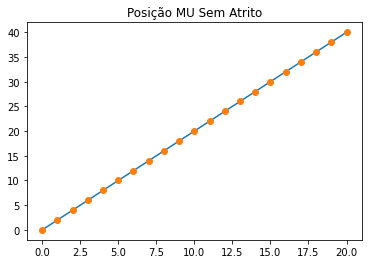

Erro da Posição:  0.0
Erro da Velocidade:  0 

Erro da Posição:  0.5
Erro da Velocidade:  0 

Erro da Posição:  1.0
Erro da Velocidade:  0 

Erro da Posição:  1.5
Erro da Velocidade:  0 

Erro da Posição:  2.0
Erro da Velocidade:  0 

Erro da Posição:  2.5
Erro da Velocidade:  0 

Erro da Posição:  3.0
Erro da Velocidade:  0 

Erro da Posição:  3.5
Erro da Velocidade:  0 

Erro da Posição:  4.0
Erro da Velocidade:  0 

Erro da Posição:  4.5
Erro da Velocidade:  0 

Erro da Posição:  5.0
Erro da Velocidade:  0 

Erro da Posição:  5.5
Erro da Velocidade:  0 

Erro da Posição:  6.0
Erro da Velocidade:  0 

Erro da Posição:  6.5
Erro da Velocidade:  0 

Erro da Posição:  7.0
Erro da Velocidade:  0 

Erro da Posição:  7.5
Erro da Velocidade:  0 

Erro da Posição:  8.0
Erro da Velocidade:  0 

Erro da Posição:  8.5
Erro da Velocidade:  0 

Erro da Posição:  9.0
Erro da Velocidade:  0 

Erro da Posição:  9.5
Erro da Velocidade:  0 

Erro da Posição:  10.0
Erro da Velocidade:  0 



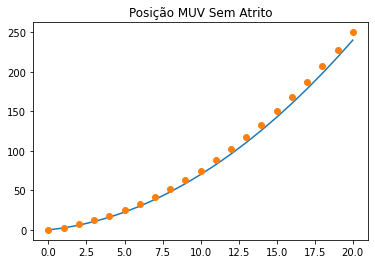

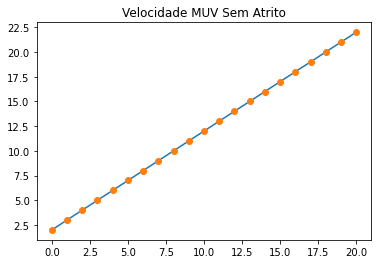

In [1]:
import math
import matplotlib.pyplot as pyplot
import csv

#Solucao Euler
#Xt = Xt-1 + Vt * dt
def nextXeuler(x,v,dt):
    return (x+v*dt)
#Vt = Vt-1 + a*dt
def nextVeuler(v, dt, params):
    return (v+params[0]*dt)

#Solucao Analitica
#Xt = X0 + V0*t + (a*t**2)/2
def nextXa(t, params):
    return (params[0]*t*t*0.5 + params[1]*t + params[2])

#Vt = V0 + a*t
def nextVa(t, params):
    return (params[1] + params[0]*t) 

def muv_semAtrito(x, v, a, t, tf, dt):
    #variável temporária para velocidade analítica
    va = v
    
    #variável temporária para posição analítica
    xa = x
    params = [a,v,x]
    # velocidades de cada ponto encontrados por Euler
    vEuler = []

    # posições de cada ponto encontrados por Euler
    xEuler = []

    # velocidades de cada ponto encontrados pelo metodo analitico
    vAnalitico = []

    # posições de cada ponto encontrados pelo metodo analitico
    xAnalitico = []

    while (t<=tf):
        va =  nextVa(t, params)
        xa = nextXa(t, params)
        vAnalitico.append(va)
        xAnalitico.append(xa)
        xEuler.append(x)
        vEuler.append(v)
        print('Erro da Posição: ', x - xa) #erro_posicao
        print('Erro da Velocidade: ', v - va, '\n') #erro_velocidade
        t += dt
        v = nextVeuler(v,dt, params)
        x = nextXeuler(x,v,dt)

    with open('muv.csv', 'w', newline='') as csvfile:  
      c = csv.writer(csvfile)
      
      c.writerow(vAnalitico)
      c.writerow(xAnalitico)
      c.writerow(xEuler)
      c.writerow(vEuler)

    pyplot.figure(0)
    pyplot.plot(xAnalitico,label='Analítica') 
    pyplot.plot(xEuler,label='Euler',linestyle='',marker='o') 
    pyplot.title('Posição MUV Sem Atrito')
    pyplot.show(block=False)

    pyplot.figure(1)
    pyplot.plot(vAnalitico,label='Analítica') 
    pyplot.plot(vEuler,label='Euler',linestyle='',marker='o') 
    pyplot.title('Velocidade MUV Sem Atrito')
    pyplot.show()

def mu_semAtrito(x, v, t, tf, dt):
    a = 0

    #variável temporária para velocidade analítica
    va = v
    
    #variável temporária para posição analítica
    xa = x
    
    params = [a,v,x]

    # posições de cada ponto encontrados por Euler
    xEuler = []

    # posições de cada ponto encontrados pelo metodo analitico
    xAnalitico = []
    
    while (t<=tf):
        xa = nextXa(t, params)
        xAnalitico.append(xa)
        xEuler.append(x)
        print('Erro da Posição: ', x - xa) #erro_posicao
        t += dt
        x = nextXeuler(x,v,dt)
    with open('mu.csv', 'w', newline='') as csvfile:  
      c = csv.writer(csvfile)      
      c.writerow(xAnalitico)
      c.writerow(xEuler)
      

    pyplot.figure(0)
    pyplot.plot(xAnalitico,label='Analítica') 
    pyplot.plot(xEuler,label='Euler',linestyle='',marker='o') 
    pyplot.title('Posição MU Sem Atrito')
    pyplot.show(block=False)

def main():
    # posição inicial
    x = 0

    # velociade inicial
    v = 2 

    # tempo entre cada simulação
    dt = 1

    # tempo total de simulação
    tf = 20

    # tempo inicial
    t = 0

    #aceleração
    a = 1

   
    mu_semAtrito(x, v, t, tf, dt)
    muv_semAtrito(x, v, a, t, tf, dt)


main() 


#Queda Livre

Nos gráficos que serão feitos nessa seção, o contínuo azul representa a curva formada pelo método analítico, já o laranja com bolas representa o método de euler 

Aqui serão calculados xe(t), xa(t), ve(t) e va(t) para a queda livre


Erro da Posição:  0.0
Erro da Posição:  4.9
Erro da Posição:  9.8
Erro da Posição:  14.700000000000003
Erro da Posição:  19.599999999999994
Erro da Posição:  24.499999999999986
Erro da Posição:  29.400000000000006
Erro da Posição:  34.299999999999955
Erro da Posição:  39.19999999999993
Erro da Posição:  44.09999999999991
Erro da Posição:  48.99999999999983
Erro da Posição:  53.89999999999975
Erro da Posição:  58.79999999999984
Erro da Posição:  63.69999999999982
Erro da Posição:  68.59999999999968
Erro da Posição:  73.49999999999977
Erro da Posição:  78.39999999999964
Erro da Posição:  83.2999999999995
Erro da Posição:  88.19999999999959
Erro da Posição:  93.09999999999968


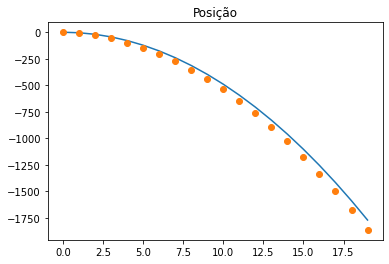

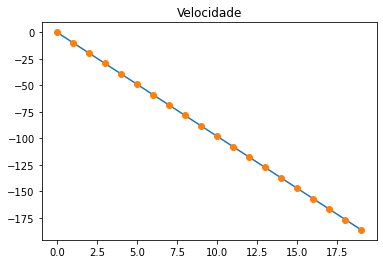

In [0]:
import math
import matplotlib.pyplot as pyplot
import csv

# METODO DE EULER
## acha o proximo ponto encontrado pelo metodo de euler
def nextXEuler(x, v, dt):
  return (x + dt*v)

## acha a velocidade pelo metodo de euler
def nextVEuler(v, dt, g):
  return (v + g*dt)

# METODO ANALITICO
## acha o ponto correspondente no instante t pelo metodo analitica
def nextXAnalitico(t,g):
  return ((g*t**2)/2)

## acha a velociade correspondente no instante t pelo metodo
def nextVAnalitico(t,g):
  return (g*t)

def main():
  # posição inicial
  x = 0
  # velociade inicial
  v = 0 
  # tempo entre cada simulação
  dt = 1
  # tempo total de simulação
  tf = 20
  # tempo inicial
  t = 0

  # valor da aceleração da gravidade
  g = -9.8

  # erro de posição
  erroVel = []

  # erro de velocidade
  erroPos = []

  # velocidades de cada ponto encontrados por Euler
  vEuler = []

  # posições de cada ponto encontrados por Euler
  xEuler = []

  # velocidades de cada ponto encontrados pelo metodo analitico
  vAnalitico = []

  # posições de cada ponto encontrados pelo metodo analitico
  xAnalitico = []

  while (t < tf):
    # pega o velocidade instantanea naquele momento
    vAnalitico.append(nextVAnalitico(t, g))
    xAnalitico.append(nextXAnalitico(t, g))
    vEuler.append(v)
    xEuler.append(x)

    print('Erro da Posição: ', abs(x - nextXAnalitico(t, g)))

    erroPos.append(abs(v - nextVAnalitico(t, g)))
    erroVel.append(abs(x - nextXAnalitico(t, g)))

    t += dt

    # pega a pariação ocorrida em um espaço de tempo (dt)
    v = nextVEuler(v, dt, g)
    x = nextXEuler(x, v, dt)

  with open('queda_livre.csv', 'w', newline='') as csvfile:  
    c = csv.writer(csvfile)
    
    c.writerow(vAnalitico)
    c.writerow(xAnalitico)
    c.writerow(vEuler)
    c.writerow(xEuler)
  

  pyplot.figure(0)
  pyplot.plot(xAnalitico, label='Analíitico')
  pyplot.plot(xEuler, label='Euler',linestyle='',marker='o') 
  pyplot.title('Posição')
  pyplot.show(block=False)

  pyplot.figure(1)
  pyplot.plot(vAnalitico, label='Analítico')
  pyplot.plot(vEuler, label='Euler',linestyle='',marker='o')
  pyplot.title('Velocidade')
  pyplot.show()

main()

Come é possível ver no grafico da velocidade, tanto ve(t) quanto va(t) tiveram basicamente os mesmos resultados pois a velocidade cresce linearmente pois d²y/dt² é linear (-g), logo o erro teórico é zero há apenas uma crescida no erro calculado provavelmente pela precisão do computador.
Já no grafico da posição, o xe(t) tem uma pequena variação de xa(t), já que, dt não é suficientemente pequeno para deixar o xe(t) preciso o suficiente.

#Bloco em rampa

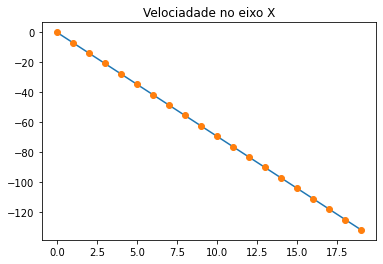

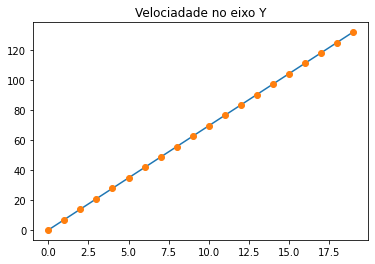

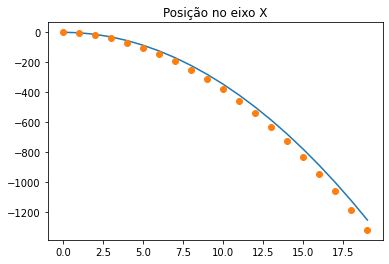

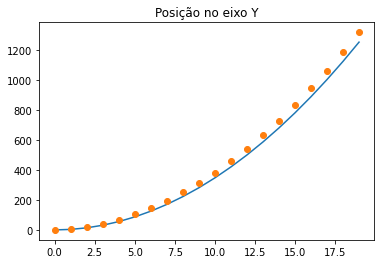

In [0]:
import math
import matplotlib.pyplot as pyplot
import csv

# METODO DE EULER
## acha o proximo ponto encontrado pelo metodo de euler
## é usado tanto pro eixo x quanto pro y
def nextXEuler(x, v, dt):
  return (x + dt*v)

## acha a velocidade no eixo x pelo metodo de euler
def nextVEulerX(v, dt, g, teta):
  return (v + math.sin(teta)*g*dt)

## acha a velocidade no eixo y pelo metodo de euler
def nextVEulerY(v, dt, g, teta):
  return (v - math.cos(teta)*g*dt)

# METODO ANALITICO
## acha o ponto correspondente eixo x no instante t pelo metodo analitica
def nextXAnaliticoX(t,g,teta):
  return (math.sin(teta)*(g*t**2)/2)

## acha o ponto correspondente eixo y no instante t pelo metodo analitica
def nextXAnaliticoY(t,g,teta):
  return (-math.cos(teta)*(g*t**2)/2)

## acha a velociade correspondente do eixo x instante t pelo metodo
def nextVAnaliticoX(t,g,teta):
  return (math.sin(teta)*g*t)

## acha a velociade correspondente eixo y no instante t pelo metodo
def nextVAnaliticoY(t,g,teta):
  return (-math.cos(teta)*g*t)

def main():
  # posição inicial no eixo x
  posX = 0
  # posição inicial no eixo x
  posY = 0
  # velociade inicial no eixo x
  vx = 0 
  # velociade inicial no eixo y
  vy = 0
  # inclinação da rampa
  teta = math.pi/4
  # tempo entre cada simulação
  dt = 1
  # tempo total de simulação
  tf = 20
  # tempo inicial
  t = 0

  # valor da aceleração da gravidade
  g = -9.8

  # velocidades de cada ponto encontrados por Euler
  vEuler = []

  # posições de cada ponto encontrados por Euler
  xEuler = []

  # velocidades de cada ponto do eixo x encontrados por Euler
  vEulerX = []

  # velocidades de cada ponto do eixo y encontrados por Euler
  vEulerY = []

  # posições de cada ponto do eixo x encontrados por Euler
  posEulerX = []

  # posições de cada ponto do eixo y encontrados por Euler
  posEulerY = []

  # velocidades de cada ponto encontrados do eixo x pelo metodo analitico
  vAnaliticoX = []

  # velocidades de cada ponto encontrados do eixo y pelo metodo analitico
  vAnaliticoY = []

  # posições de cada ponto encontrados no eixo x pelo metodo analitico
  posAnaliticoX = []

  # posições de cada ponto encontrados no eixo y pelo metodo analitico
  posAnaliticoY = []

  while (t < tf):
    # pega o velocidade instantanea naquele momento
    vAnaliticoX.append(nextVAnaliticoX(t, g, teta))
    vAnaliticoY.append(nextVAnaliticoY(t, g, teta))
    posAnaliticoX.append(nextXAnaliticoX(t, g, teta))
    posAnaliticoY.append(nextXAnaliticoY(t, g, teta))
    vEulerX.append(vx)
    vEulerY.append(vy)
    posEulerX.append(posX)
    posEulerY.append(posY)

    #print('Erro: ', abs(x - nextXAnalitico(t, g, teta)))

    #erroPos.append(abs(v - nextVAnalitico(t, g, teta)))
    #erroVel.append(abs(x - nextXAnalitico(t, g, teta)))

    t += dt

    # pega a pariação ocorrida em um espaço de tempo (dt)
    vx = nextVEulerX(vx, dt, g, teta)
    vy = nextVEulerY(vy, dt, g, teta)
    posX = nextXEuler(posX, vx, dt)
    posY = nextXEuler(posY, vy, dt)

  with open('bloco_em_rampa.csv', 'w', newline='') as csvfile:  
    c = csv.writer(csvfile)
    
    c.writerow(vAnaliticoX)
    c.writerow(vAnaliticoY)
    c.writerow(posAnaliticoX)
    c.writerow(posAnaliticoY)
    c.writerow(vEulerX)
    c.writerow(vEulerY)
    c.writerow(posEulerX)
    c.writerow(posEulerY)
  

  pyplot.figure(0)
  pyplot.plot(vAnaliticoX, label='Analítico')
  pyplot.plot(vEulerX, label='Euler',linestyle='',marker='o')
  pyplot.title('Velocidade no eixo X')
  pyplot.show(block=False)

  pyplot.figure(2)
  pyplot.plot(vAnaliticoY, label='Analítico')
  pyplot.plot(vEulerY, label='Euler',linestyle='',marker='o')
  pyplot.title('Velocidade no eixo Y')
  pyplot.show(block=False)

  pyplot.figure(1)
  pyplot.plot(posAnaliticoX, label='Analítico')
  pyplot.plot(posEulerX, label='Euler',linestyle='',marker='o') 
  pyplot.title('Posição no eixo X')
  pyplot.show()

  pyplot.figure(3)
  pyplot.plot(posAnaliticoY, label='Analítico')
  pyplot.plot(posEulerY, label='Euler',linestyle='',marker='o') 
  pyplot.title('Posição no eixo Y')
  pyplot.show()


main()

Como pode ser visto nos gráficos, como d²x/dt² e d²y/dt² são lineares (com teta fixo), as suas velocidades não tem erro (pelo menos na teoria) ou diferença entre os métodos analítico e por Euler há apenas uma peguena diferença quase nula devido a precisão sob operações do computador.
Apenas houve uma grande diferença nos graficos da posição, tanto do eixo x quanto no y.